# Data Exploration and Visualization Lab (HomeWork Last Set)
## Conducted by: Dr. Kaustav Sengupta
### Sumbitted by: Amir Ali

#### Import Required Libraries For This Task

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter as c
from matplotlib import pyplot as plt
%matplotlib inline

## Homework # 01
1. Take an empty graph with only nodes.
2. Add edges to the graph randomly using Erdős–Rényi model till you get a complete graph.
3. Calculate the Freemans formula for each step (after adding each edge).
4. Plot the results.


<b>Freemans centrality equation:</b><br>

$C=\frac{\sum_{i=1}^{N} C(p_*)-C(p_i)}{\max \sum_{i=1}^{N} C(p_*)-C(p_i)}$


For Freeman centrality consider degree centrality and for the number of nodes(n) the max degree centrality of a graph will be n-1.The max sum of the diff b/w the most central node and all the other will be for star topology.
The max sum of difference will calculate using the equation:

$\sum_i^{n-1} (C_{max} - C_i) = \sum_i^{n-1} (n - 1 - 1) = -2n-2 \sum_i^{n-1} n = n^2-3n-2$



In [2]:
number = 50
number_of_nodes = list(range(number))
Graph = nx.Graph()                         # using networks library
Graph.add_nodes_from(number_of_nodes)

#The max sum of the difference between the most central node
maximum = number**2 - 3 * number - 2
graph_size = number * (number-1) / 2

freeman_list = []

while not len(Graph.edges()) == graph_size:
    a, b = np.random.choice(number_of_nodes, size=2, replace=False)
    if a in Graph[b]:
        continue
    Graph.add_edge(a, b)
    
    centr = dict(nx.degree(Graph))
    max_centr = max(centr.values())
    
    freeman = sum(max_centr - np.array(list(centr.values()))) / maximum
    freeman_list.append(freeman)
    

# Plot the result
fig = px.line(freeman_list)
fig.update_layout(
    title = "Freemans centrality",
    xaxis_title='edges', 
    yaxis_title='centrality')

## Homework # 02
1. Solve the Questions from the slide e “Network Centrality”.

It's depend upon various factor such as network properties, context and aim of the analysis.

There square measure many various measures of centrality.

The simplest approach would be to calculate the degree of a node. Another may well be shrewd the weighted add of neighbor's degrees. This approach focuses on the notion of being connected to different necessary nodes. this fashion of brooding about centrality is wide used on the globe wide net and social media platforms.

A different approach to centrality is termed 'betweenness'. It focuses on a question: however necessary is that this node in terms of traffic between all different nodes?
Nodes with high betweenness centrality have influence within the network by virtue of their management over data passing between others.

They have plenty of power: their removal would disrupt communication. This will be helpful in graphs representing traffic, e.g. causation information packages.

Another one is 'closeness' centrality. It answers the question: however, on average, this node is near to all different nodes (in terms of the shortest path).

This is helpful for instance in social media networks, wherever this will show what proportion it takes one person to attach to others.

## Homework # 03
1. Open the Drosophila Network already provided
2. Check the various properties of the network.<br>
   a. Is the network scale free<br>
   b. Can you find the important players of the network?

In [2]:
loc = 'C:\\Users\\amir\\Data Science\\Data Exploration and Visualization\\Homework\\Homework 5\\Data\\drosophhila_net'
dataset = pd.read_csv(loc, delimiter='\t')
dataset.tail(3)

FBGN_GENE1_BD  ...        INTERACTION_DETECT_METHODS
9004   FBgn0004107  ...  psi-mi:MI:0397(two hybrid array)
9005   FBgn0004107  ...  psi-mi:MI:0397(two hybrid array)
9006   FBgn0004107  ...  psi-mi:MI:0397(two hybrid array)

[3 rows x 23 columns]

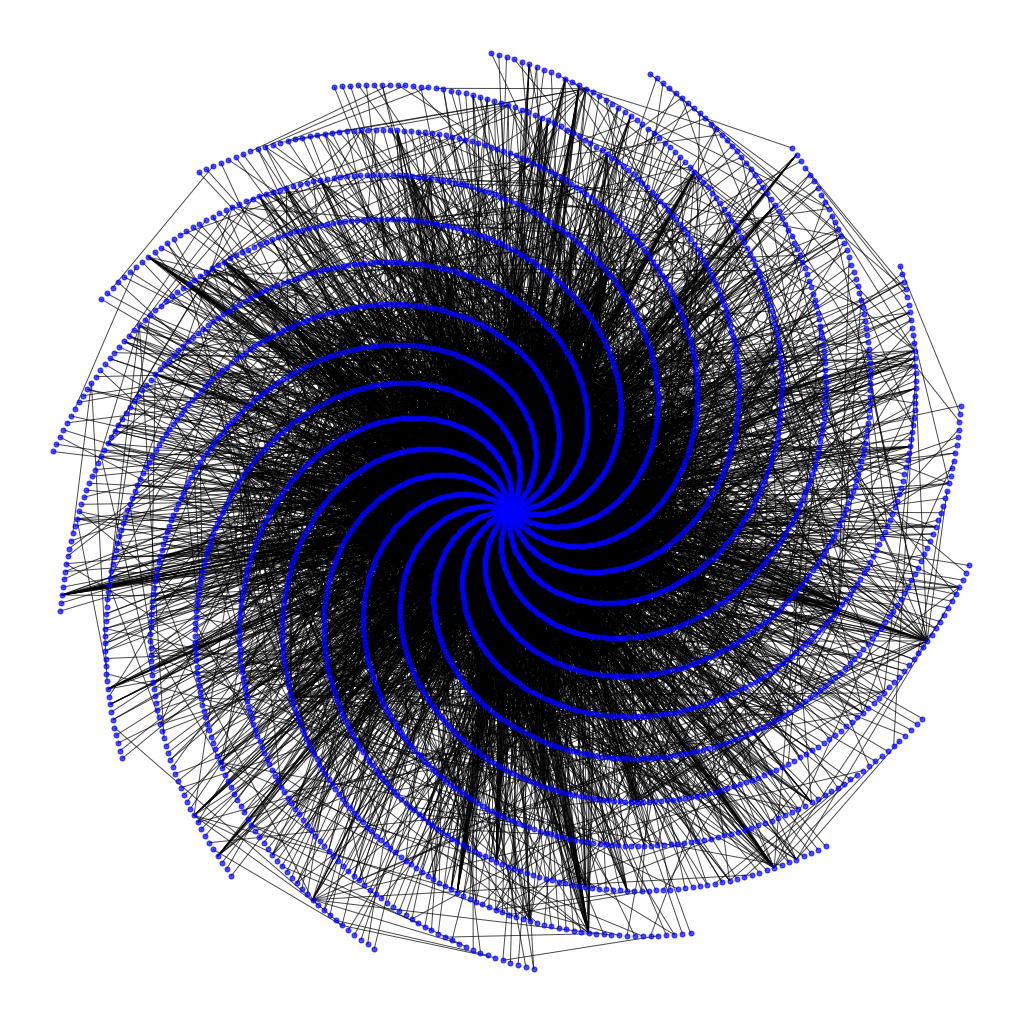

In [18]:
G = nx.Graph()
edges = dataset.loc[:, ['FBGN_GENE1_BD', 'FBGN_GENE2_AD']].apply(list, axis=1).tolist()
G.add_edges_from(edges)
n = len(G.nodes())

plt.figure(figsize=(14,14))
nx.draw(G, pos=nx.spiral_layout(G), alpha =0.7, node_size=25, node_color='blue')

In [46]:
degrees = dict(nx.degree(G))

In [47]:
# Histogram
px.histogram(degrees.values(), range_x=(0,30))

In [48]:
# Scatter Plot
distribution = {degree: count/n for (degree, count) in c(degrees.values()).items()}
px.scatter(x=distribution.keys(), y=distribution.values(), log_y=True, log_x=True)

In [59]:
# Here is Top 10 Value of Degree, Page Rank and EigenVector
def get_10_best(nodes_scores):
    return sorted(nodes_scores.items(), key=lambda x: x[1], reverse=True)[:10]

In [61]:
d = get_10_best(degrees)
print('Degree', d)

Degree [('FBgn0042102', 133), ('FBgn0027364', 98), ('FBgn0004107', 85), ('FBgn0039858', 83), ('FBgn0030668', 83), ('FBgn0016131', 79), ('FBgn0025637', 76), ('FBgn0025674', 71), ('FBgn0031957', 70), ('FBgn0031768', 70)]


In [62]:
p = get_10_best(nx.pagerank(G))
print('Page Rank', p)

Page Rank [('FBgn0042102', 0.00514712895457902), ('FBgn0027364', 0.004496552538345669), ('FBgn0038172', 0.004367425965991566), ('FBgn0004107', 0.00365115399758749), ('FBgn0025637', 0.0036419358547211127), ('FBgn0264087', 0.0034679293244283533), ('FBgn0030668', 0.0030313952769503655), ('FBgn0032773', 0.0030206937024864658), ('FBgn0039856', 0.0029828502344195003), ('FBgn0031768', 0.0029586654128852703)]


In [65]:
e = get_10_best(nx.eigenvector_centrality(G))
print('Eigen Vector', e)

Eigen Vector [('FBgn0039858', 0.21356240461929688), ('FBgn0025674', 0.19455235957558323), ('FBgn0042102', 0.18360639066096418), ('FBgn0016131', 0.1808223778271696), ('FBgn0026371', 0.16356507248189708), ('FBgn0037345', 0.16155443601609915), ('FBgn0004107', 0.1509872224079366), ('FBgn0030668', 0.1325110712432476), ('FBgn0028509', 0.12659474390516484), ('FBgn0003114', 0.12033716784750553)]


## Homework # 04
1. Open the drosophila network
2. Run the MCODE algorithm
3. Run the MCL algorithm<br>
    a. Compare the results<br>
    b. Are there some filtering options<br>
    c. Play with the settings and observe the influence.

#### Full Graph

![](Images/1.png)

#### MCL Algorithm with default parameters

![MCL Algorithm](Images/2.png)

#### Cluster

![MCL Algorithm](Images/3.png)

#### MCL Algorithm with Inflation

![MCL Little Inflation](Images/4.png)